In [1]:
import tensorflow as tf
tf.__version__

'2.18.0'

In [2]:
from tensorflow import keras
keras.__version__

'3.6.0'

In [3]:
from keras import datasets

In [4]:
mnist = datasets.mnist

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
import numpy as np
import matplotlib.pyplot as plt

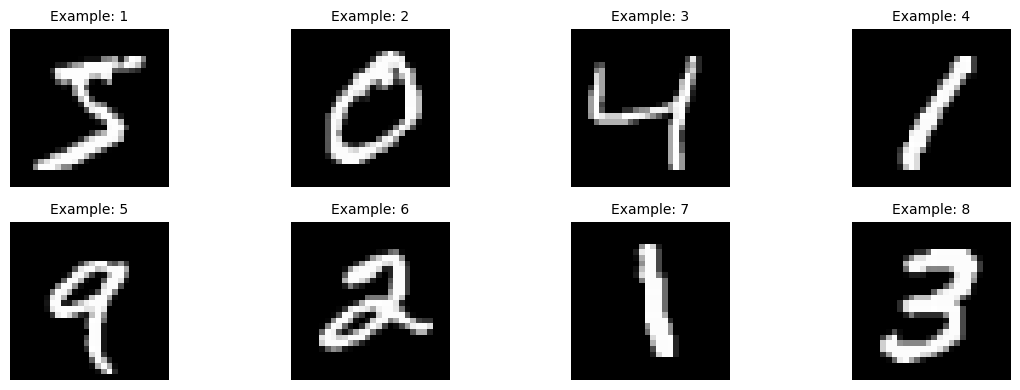

In [9]:
plt.figure(figsize=(12, 4)) 
for index, digit in zip(range(1, 9), X_train[:8]):
    plt.subplot(2, 4, index)
    plt.imshow(np.reshape(digit, newshape=(28, 28)), cmap=plt.cm.gray)
    plt.title(f"Example: {index}", fontsize=10) 
    plt.axis('off')  

plt.tight_layout()  
plt.show()


In [10]:
from sklearn.model_selection import train_test_split

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

In [11]:
X_test.shape,  y_test.shape

((5000, 28, 28), (5000,))

In [12]:
from keras import models
from keras import layers

In [13]:
network = models.Sequential()

network.add(layers.Dense(300, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(100, activation='relu'))
network.add(layers.Dense(10,activation='softmax'))

c:\Users\carva\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
network.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
network.layers

[<Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [16]:
hidden1 = network._layers[1]
hidden1

<Dense name=dense, built=True>

In [17]:
weights, biases = hidden1.get_weights()

In [18]:
weights

array([[ 0.04746701,  0.01875682, -0.02425801, ..., -0.05783869,
        -0.01043507,  0.03362375],
       [ 0.02680852, -0.04059441, -0.00595172, ...,  0.02090555,
        -0.01052403, -0.02398039],
       [ 0.01801451,  0.06259903,  0.06574626, ..., -0.02367436,
        -0.05957129,  0.03920145],
       ...,
       [-0.01131049,  0.0435506 , -0.00978402, ..., -0.04969964,
        -0.04439685, -0.06158922],
       [ 0.05055311, -0.04245225,  0.04104047, ...,  0.06414264,
         0.07108009,  0.01241107],
       [ 0.06525911, -0.0060299 , -0.06592103, ...,  0.06619105,
        -0.0341368 ,  0.07268266]], dtype=float32)

In [19]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [20]:
network.compile(optimizer='sgd',
        loss="categorical_crossentropy",
        metrics=['accuracy', 'precision'])

In [21]:
X_train_prep = X_train.reshape((60000, 28*28))
X_train_prep = X_train_prep.astype('float32')/255

X_test_prep = X_test.reshape((5000, 28*28))
X_test_prep = X_test_prep.astype('float32')/255

X_val_prep = X_val.reshape((5000, 28*28))
X_val_prep = X_val_prep.astype('float32')/255


In [22]:
X_train.shape, X_train_prep.shape

((60000, 28, 28), (60000, 784))

In [23]:
from keras.utils import to_categorical

y_train_prep = to_categorical(y_train)
y_test_prep = to_categorical(y_test)
y_val_prep = to_categorical(y_val)

In [24]:
history = network.fit(X_train_prep,
                      y_train_prep,
                      epochs=30,
                      validation_data=(X_val_prep, y_val_prep))

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7541 - loss: 0.9459 - precision: 0.9199 - val_accuracy: 0.9096 - val_loss: 0.3046 - val_precision: 0.9437
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9192 - loss: 0.2868 - precision: 0.9433 - val_accuracy: 0.9336 - val_loss: 0.2380 - val_precision: 0.9522
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9344 - loss: 0.2296 - precision: 0.9522 - val_accuracy: 0.9406 - val_loss: 0.2090 - val_precision: 0.9534
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9434 - loss: 0.1929 - precision: 0.9595 - val_accuracy: 0.9484 - val_loss: 0.1818 - val_precision: 0.9596
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9513 - loss: 0.1676 - precision: 0.9637 - val_accuracy: 0.9516 - val_loss: 0.1673 - val_precision: 0.9608
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9567 - loss: 0.1542 - precision: 0.9669 - val_accuracy: 0.9570

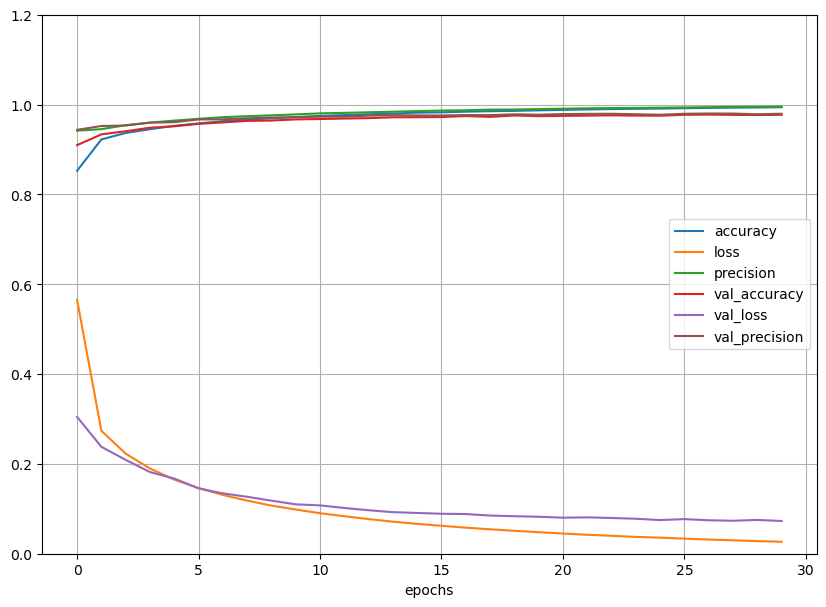

In [25]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(10,7))
plt.grid(True)
plt.gca().set_ylim(0,1.2)
plt.xlabel("epochs")
plt.show()

In [26]:
history = network.fit(X_train_prep,
                      y_train_prep,
                      epochs = 5,
                      validation_data = (X_val_prep, y_val_prep))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9954 - loss: 0.0242 - precision: 0.9962 - val_accuracy: 0.9766 - val_loss: 0.0749 - val_precision: 0.9793
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9953 - loss: 0.0238 - precision: 0.9964 - val_accuracy: 0.9776 - val_loss: 0.0734 - val_precision: 0.9793
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9956 - loss: 0.0224 - precision: 0.9964 - val_accuracy: 0.9778 - val_loss: 0.0737 - val_precision: 0.9803
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9964 - loss: 0.0206 - precision: 0.9971 - val_accuracy: 0.9770 - val_loss: 0.0731 - val_precision: 0.9793
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9961 - loss: 0.0193 - precision: 0.9970 - val_accuracy: 0.9764 - val_loss: 0.0732 - val_precision: 0.9793


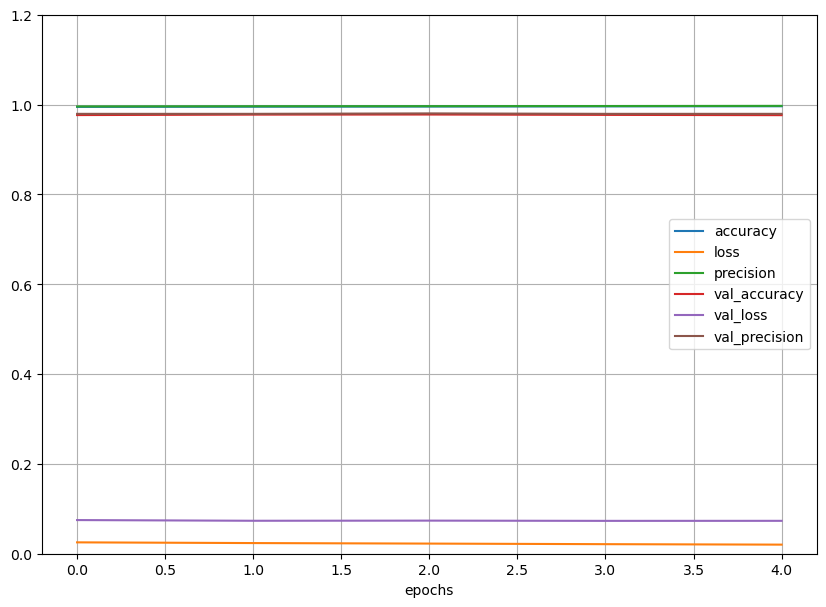

In [28]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.grid(True)
plt.gca().set_ylim(0,1.2)
plt.xlabel("epochs")
plt.show()

In [29]:
test_loss, test_acc, test_prec = network.evaluate(X_test_prep,y_test_prep)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9776 - loss: 0.0684 - precision: 0.9806


In [31]:
print(f'test loss:{test_loss},\n test acc:{test_acc},\n test precisio:{test_prec}')

test loss:0.06461409479379654,
 test acc:0.9782000184059143,
 test precisio:0.9807151556015015
